**1. Import libraries**

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

**2. Dataset and model preparation**

In [37]:
# Load the dataset
df = pd.read_csv('housing.csv')

In [38]:
# Preparing the data
X = df.drop(columns=['median_house_value', 'ocean_proximity', 'longitude', 'latitude'])  # Drop target and non-numeric feature
y = df['median_house_value']

In [39]:
# Fill missing values (if any) with the median of each column
X.fillna(X.median(), inplace=True)

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Create the linear regression model
model = LinearRegression()

**3. Performing recursive feature elimination (RFE) to the df**

In [42]:
# Perform RFE with the number of features equal to the total number of features in X
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [43]:
# Get feature ranking
ranking = rfe.ranking_
features = X.columns
ranked_features = sorted(zip(ranking, features))

# Display ranked features
print("Feature Ranking from most to least important:")
for rank, feature in ranked_features:
    print(f"{rank}: {feature}")

Feature Ranking from most to least important:
1: median_income
2: housing_median_age
3: households
4: population
5: total_bedrooms
6: total_rooms


**4. Performance to number of features plotting**

In [44]:
# Plot the model performance against the number of features
num_features = list(range(1, len(features) + 1))
rfe_performance = []

In [45]:
# Evaluate model performance with different numbers of features
for n in num_features:
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X_train, y_train)
    rfe_performance.append(rfe.score(X_test, y_test))

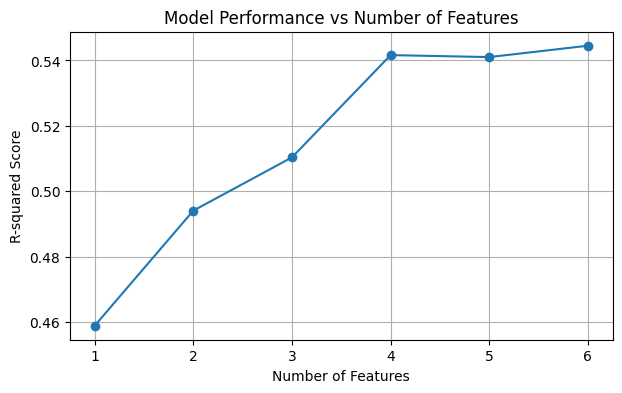

In [46]:
# Plot the performance
plt.figure(figsize=(7, 4))
plt.plot(num_features, rfe_performance, marker='o')
plt.title('Model Performance vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R-squared Score')
plt.grid(True)
plt.show()